In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

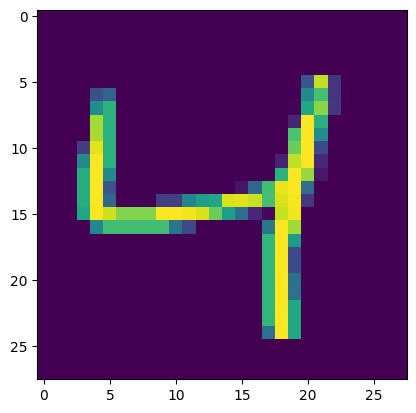

In [5]:
plt.imshow(train_images[2])
plt.show()

In [6]:
train_labels[2]

4

In [7]:
# Preprocess input data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
#Preprocess class labels
train_labels =to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
#Define model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

In [10]:
# Compile model
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
#Fit model on training data
model_history=model.fit(train_images, train_labels,
          batch_size=128,
          epochs=5,validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 7s 14ms/step - loss: 0.2939 - accuracy: 0.9163 - val_loss: 0.1471 - val_accuracy: 0.9596
Epoch 2/5
375/375 [==============================] - 4s 10ms/step - loss: 0.1220 - accuracy: 0.9652 - val_loss: 0.1093 - val_accuracy: 0.9681
Epoch 3/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0806 - accuracy: 0.9765 - val_loss: 0.0902 - val_accuracy: 0.9724
Epoch 4/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0586 - accuracy: 0.9827 - val_loss: 0.0833 - val_accuracy: 0.9740
Epoch 5/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0795 - val_accuracy: 0.9762


In [13]:
#Evaluate model on test data
score = model.evaluate(test_images,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9780
Test loss: 0.07243220508098602
Test accuracy: 0.9779999852180481


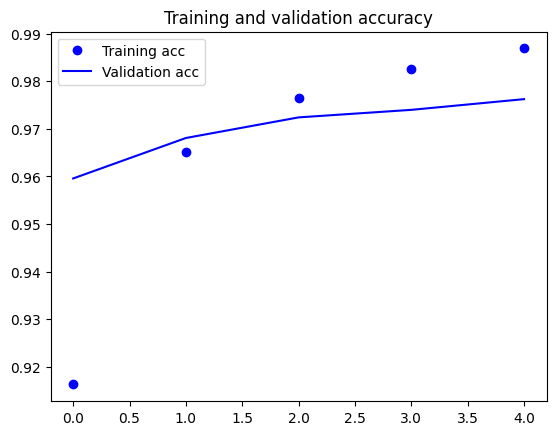

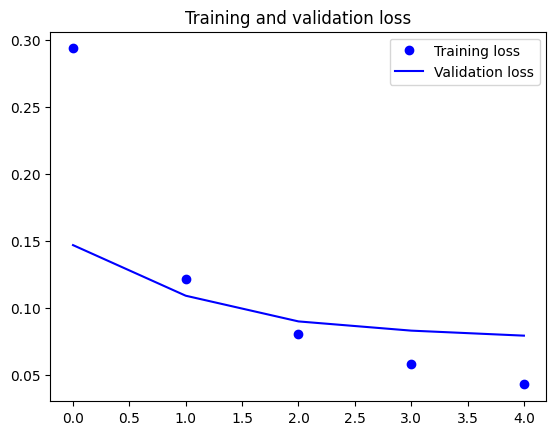

In [14]:
#checking the overfit with comparing training accuracy and validation accuracy
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()